<a href="https://colab.research.google.com/github/alcarvalhox/analise_de_oleo/blob/main/Classificadores_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn==0.22

In [ ]:
!python --version

Python 3.7.10


In [1]:
pip install xgboost

In [ ]:
pip install six

In [2]:
pip install catboost

In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Fri May 14 14:18:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pandas_profiling import ProfileReport
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE,SVMSMOTE
from imblearn.pipeline import make_pipeline,Pipeline
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
from collections import Counter


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported fro

In [ ]:
import sklearn
sklearn.__version__

'0.22'

# **Carrega dados**

In [4]:
analise_tx_pdr3_2cl_p = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_tx_pdr3_2cl_p.csv",sep = ',',encoding = 'utf8')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df1= analise_tx_pdr3_2cl_p[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']]

#df1= analise_tx_pdr3[['TX_FERRO',                 
#                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
#                 'LIM_SULFATACAO','LIM_TBN','TARGET']]

#df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CHUMBO','TX_COBRE',
#                 'TX_SILICIO','TX_SODIO',
#                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
#                 'LIM_SULFATACAO','LIM_TBN','TARGET']]

#df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
#                 'TX_SILICIO','TX_SODIO',
#                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
#                 'LIM_SULFATACAO','LIM_TBN','TARGET']]

#df1= analise_tx_pdr3[['TX_FERRO','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
#                 'LIM_SULFATACAO','LIM_TBN','TARGET']]

#df1= analise_tx_pdr3[['LIM_VISCOSIDADE','LIM_FULIGEM','LIM_OXIDACAO',
#                 'LIM_SULFATACAO','LIM_TBN','TARGET']]                 

df1.head()


,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
0,-0.060419,-0.363716,-0.05956,-0.24427,-0.186328,-0.018469,-0.03869,-0.261321,-0.35881,0.0,17.761611,-0.006387,7.545777,-0.128676,-0.008258,-0.010925,MONITORAR
1,-0.060419,-0.363716,-0.05956,-0.24427,-0.186328,-0.018469,-0.03869,-0.261321,-0.35881,0.0,-0.056301,-0.006387,-0.132524,-0.128676,-0.008258,-0.010925,NORMAL
2,-0.060419,-0.363716,-0.05956,-0.24427,-0.186328,-0.018469,-0.03869,-0.261321,-0.35881,0.0,-0.056301,-0.006387,-0.132524,-0.128676,-0.008258,-0.010925,NORMAL
3,-0.060419,-0.363716,-0.05956,-0.24427,-0.186328,-0.018469,-0.03869,-0.261321,-0.35881,0.0,-0.056301,-0.006387,-0.132524,-0.128676,-0.008258,-0.010925,NORMAL
4,-0.060419,-0.363716,-0.05956,-0.24427,-0.186328,-0.018469,-0.03869,-0.261321,-0.35881,0.0,-0.056301,-0.006387,-0.132524,-0.128676,-0.008258,-0.010925,NORMAL


In [6]:
df1.groupby('TARGET').count()

,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN
TARGET,,,,,,,,,,,,,,,,
MONITORAR,46744,46744,46744,46744,46744,46744,46744,46744,46744,46744,46744,46744,46744,46744,46744,46744
NORMAL,129216,129216,129216,129216,129216,129216,129216,129216,129216,129216,129216,129216,129216,129216,129216,129216


In [17]:
df1.shape

(175960, 17)

In [7]:
from collections import Counter
from imblearn.under_sampling import TomekLinks
from numpy import where

array = df1.values

# Separando o array em componentes de input (X) e output (Y)
X = array[:,0:16]
Y = array[:,16]
y = LabelEncoder().fit_transform(Y)


#X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=0,test_size = 0.25)


In [ ]:
counter_antes = Counter(y)
print(counter_antes)

# define the undersampling method
undersample = TomekLinks()
# transform the dataset
X, y = undersample.fit_resample(X, y)
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({1: 129216, 0: 46744})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Removed indexes: [     0      1      2 ... 175957 175958 175959]


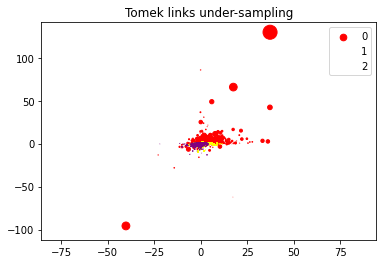

In [ ]:
from imblearn.under_sampling import TomekLinks

def plot_2d_space(X, y, label='Classes'):   
    colors = ['red', 'yellow','purple']
    markers = ['o', 's','x']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            X[y==l, 2],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

In [ ]:
id_tl.shape

(172462,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=0,test_size = 0.25)

In [13]:
c0=0;c1=0;c2=0

for s in range(len(y)):
  if y[s]==0:
    c0=c0+1
  if y[s]==1:
    c1=c1+1
  if y[s]==2:
    c2=c2+1
print('Critica ',c0)
print('Monitorar ',c1) 
print('Normal ',c2)         

Critica  46744
Monitorar  129216
Normal  0


In [9]:
y_label = Y
#X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.30, random_state=42)

classes =[]
labeles=np.unique(y_label)
for v in labeles:
    classes.append('Classe '+ str(v))
print(classes)

['Classe MONITORAR', 'Classe NORMAL']


In [ ]:
np.unique(y_train_smt)
from collections import Counter
Counter(y_train_smt).values()

dict_values([15606, 15606, 15606])

# **Análise por score com gráfico de barras de vários classificadores**

In [ ]:
names = ["Nearest_Neighbors","Decision_Tree", "Extra_Trees", "Random_Forest",
         "Neural_Net", "AdaBoost","QDA"]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5,n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    QuadraticDiscriminantAnalysis()]
  

In [ ]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
df = pd.DataFrame()
df['Classificador'] = names
df['Score'] = scores
df

,Classificador,Score
0,Nearest_Neighbors,0.670302
1,Decision_Tree,0.613585
2,Extra_Trees,0.687952
3,Random_Forest,0.652752
4,Neural_Net,0.693704
5,AdaBoost,0.544274
6,QDA,0.557858


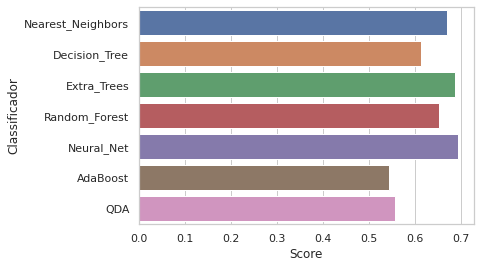

In [ ]:
sns.set(style="whitegrid")
ax=sns.barplot(y="Classificador", x="Score", data=df)
ax.get_figure()

# **Análise de vários classificadores - indicadores**

Classificador:  Logistic_Regression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Logistic_Regression
                  precision    recall  f1-score   support

  Classe CRITICA       0.55      0.71      0.62      5615
Classe MONITORAR       0.32      0.57      0.41      6144
   Classe NORMAL       0.91      0.73      0.81     32231

        accuracy                           0.70     43990
       macro avg       0.59      0.67      0.61     43990
    weighted avg       0.78      0.70      0.73     43990

Training Score:0.7044404031219217
Cross V Score: 0.7045843752367963 +/- 0.004864293454876426
Testing Score: 0.7020231870879745
Cross & Test Diff: 0.0025611881488217803
Standard Deviations Away: 0.5265282969830293
[[ 3974   801   840]
 [ 1126  3517  1501]
 [ 2123  6717 23391]]
Classificador:  Nearest_Neighbors


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Nearest_Neighbors
                  precision    recall  f1-score   support

  Classe CRITICA       0.59      0.69      0.64      5615
Classe MONITORAR       0.44      0.62      0.51      6144
   Classe NORMAL       0.92      0.82      0.87     32231

        accuracy                           0.78     43990
       macro avg       0.65      0.71      0.67     43990
    weighted avg       0.81      0.78      0.79     43990

Training Score:0.9054482079260437
Cross V Score: 0.7709782526331742 +/- 0.0032585629833070326
Testing Score: 0.7763127983632644
Cross & Test Diff: -0.005334545730090179
Standard Deviations Away: -1.6370853524753062
[[ 3874   968   773]
 [  782  3803  1559]
 [ 1892  3866 26473]]
Classificador:  Decision_Tree


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Decision_Tree
                  precision    recall  f1-score   support

  Classe CRITICA       0.99      0.78      0.87      5615
Classe MONITORAR       0.77      0.91      0.83      6144
   Classe NORMAL       0.96      0.96      0.96     32231

        accuracy                           0.93     43990
       macro avg       0.91      0.88      0.89     43990
    weighted avg       0.94      0.93      0.93     43990

Training Score:0.9296506781844358
Cross V Score: 0.9267560809274835 +/- 0.002898185409530711
Testing Score: 0.9306433280290975
Cross & Test Diff: -0.003887247101614033
Standard Deviations Away: -1.3412692952047798
[[ 4381   411   823]
 [   39  5583   522]
 [    0  1256 30975]]
Classificador:  Extra_Trees


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Extra_Trees
                  precision    recall  f1-score   support

  Classe CRITICA       0.95      0.89      0.92      5615
Classe MONITORAR       0.87      0.73      0.79      6144
   Classe NORMAL       0.95      0.99      0.97     32231

        accuracy                           0.94     43990
       macro avg       0.92      0.87      0.89     43990
    weighted avg       0.94      0.94      0.94     43990

Training Score:1.0
Cross V Score: 0.9341441236644692 +/- 0.002050712982285786
Testing Score: 0.9376903841782224
Cross & Test Diff: -0.0035462605137531744
Standard Deviations Away: -1.729281739758826
[[ 5014   261   340]
 [  187  4471  1486]
 [   50   417 31764]]
Classificador:  Random_Forest


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Random_Forest
                  precision    recall  f1-score   support

  Classe CRITICA       0.99      0.89      0.94      5615
Classe MONITORAR       0.76      0.94      0.84      6144
   Classe NORMAL       0.98      0.96      0.97     32231

        accuracy                           0.95     43990
       macro avg       0.91      0.93      0.92     43990
    weighted avg       0.95      0.95      0.95     43990

Training Score:0.9467378949761309
Cross V Score: 0.9390315980904752 +/- 0.007420879342192858
Testing Score: 0.9456922027733575
Cross & Test Diff: -0.006660604682882321
Standard Deviations Away: -0.8975492493203807
[[ 5002   376   237]
 [   28  5763   353]
 [    0  1395 30836]]
Classificador:  Neural_Net


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Neural_Net
                  precision    recall  f1-score   support

  Classe CRITICA       0.82      0.84      0.83      5615
Classe MONITORAR       0.56      0.73      0.64      6144
   Classe NORMAL       0.95      0.89      0.92     32231

        accuracy                           0.86     43990
       macro avg       0.78      0.82      0.79     43990
    weighted avg       0.88      0.86      0.87     43990

Training Score:0.8609608244297946
Cross V Score: 0.8521709479427142 +/- 0.007516248780483432
Testing Score: 0.8597408501932258
Cross & Test Diff: -0.007569902250511573
Standard Deviations Away: -1.0071383307811015
[[ 4696   524   395]
 [  379  4505  1260]
 [  633  2979 28619]]
Classificador:  AdaBoost


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  AdaBoost
                  precision    recall  f1-score   support

  Classe CRITICA       0.95      0.57      0.71      5615
Classe MONITORAR       0.68      0.97      0.80      6144
   Classe NORMAL       1.00      0.99      0.99     32231

        accuracy                           0.93     43990
       macro avg       0.88      0.84      0.83     43990
    weighted avg       0.95      0.93      0.93     43990

Training Score:0.9325149655224673
Cross V Score: 0.9083124952640752 +/- 0.00434660776420328
Testing Score: 0.9311661741304842
Cross & Test Diff: -0.02285367886640899
Standard Deviations Away: -5.257819455121227
[[ 3181  2431     3]
 [  121  5985    38]
 [   38   397 31796]]
Classificador:  QDA


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  QDA
                  precision    recall  f1-score   support

  Classe CRITICA       0.53      0.22      0.31      5615
Classe MONITORAR       0.18      0.87      0.29      6144
   Classe NORMAL       0.83      0.29      0.44     32231

        accuracy                           0.37     43990
       macro avg       0.51      0.46      0.35     43990
    weighted avg       0.70      0.37      0.40     43990

Training Score:0.3648404940516784
Cross V Score: 0.4671667803288626 +/- 0.211330950430821
Testing Score: 0.36615139804501023
Cross & Test Diff: 0.10101538228385237
Standard Deviations Away: 0.47799615758090136
[[ 1249  2941  1425]
 [  279  5351   514]
 [  851 21873  9507]]


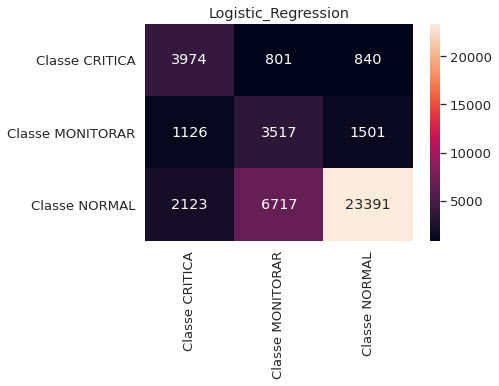

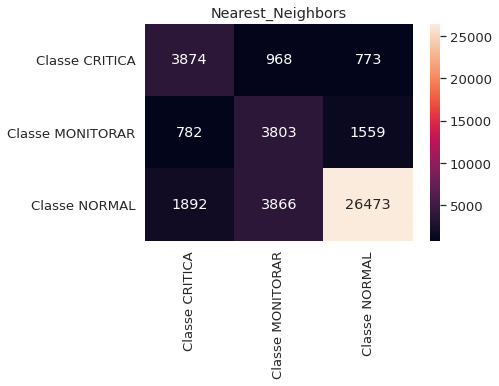

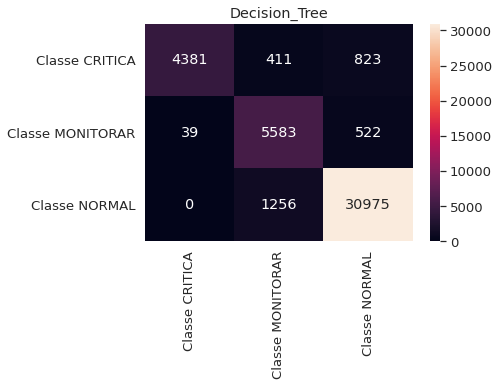

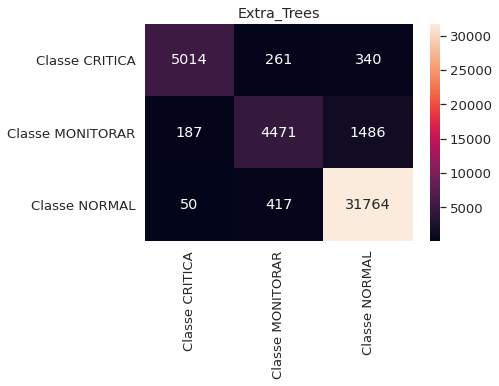

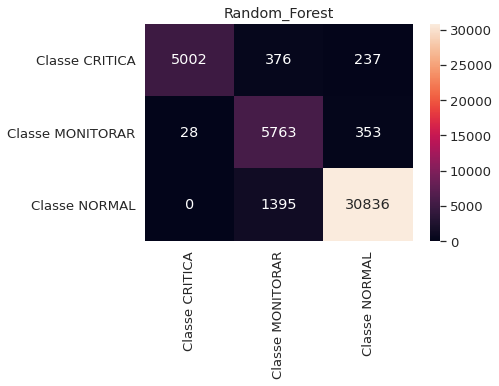

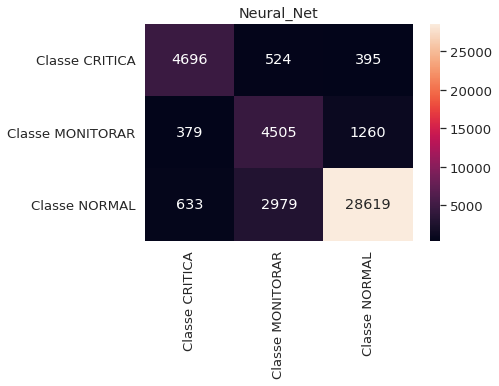

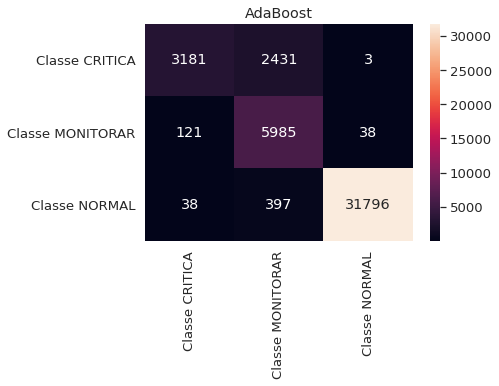

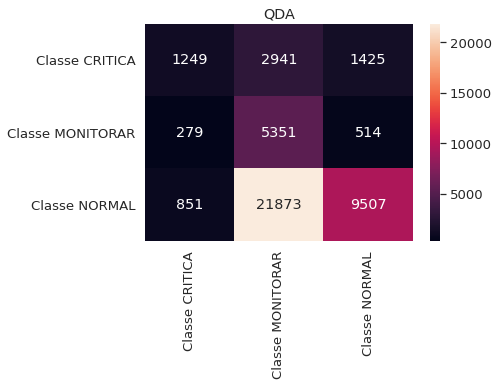

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import classification_report
%matplotlib inline

random_seed = 1234

names = ["Logistic_Regression","Nearest_Neighbors","Decision_Tree", "Extra_Trees", "Random_Forest",
         "Neural_Net", "AdaBoost","QDA"]

#names = [" Gradient Boosting"]         

classifiers = [
    LogisticRegression(),             
    KNeighborsClassifier(5),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=100, min_samples_split=2),
    RandomForestClassifier(max_depth=5,n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    QuadraticDiscriminantAnalysis()]

#classifiers = [GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
#                           learning_rate=0.1, loss='deviance', max_depth=3,
#                           max_features=None, max_leaf_nodes=None,
#                           min_impurity_decrease=0.0, min_impurity_split=None,
#                           min_samples_leaf=1, min_samples_split=2,
#                           min_weight_fraction_leaf=0.0, n_estimators=100,
#                           n_iter_no_change=None, presort='deprecated',
#                           random_state=None, subsample=1.0, tol=0.0001,
#                           validation_fraction=0.1, verbose=0,
#                           warm_start=False)]    

def evaluate_model(X_train, y_train, model,name):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), model)

    cv_results = cross_val_score(imba_pipeline, X_train, y_train, cv = 3, scoring = 'accuracy')
    clf = imba_pipeline.fit(X_train, y_train)

    preds = clf.predict(X_test)
   
    diff = cv_results.mean() - clf.score(X_test, y_test)
    SD = diff / cv_results.std()
    report = classification_report(y_test, preds,target_names= classes)

    print('Classificador: ',name)
    print(report)
    print(f"Training Score:{clf.score(X_train, y_train)}")
    print(f"Cross V Score: {cv_results.mean()} +/- {cv_results.std()}")
    print(f"Testing Score: {clf.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

    cm = confusion_matrix(y_test,preds)
           
    return cm

for name, model in zip(names, classifiers):
    
    #evaluate_model(X_train, y_train, model,name) 
    print('Classificador: ',name)
    (cm)= evaluate_model(X_train, y_train, model,name) 
    sns.set(font_scale=1.2)
    plt.figure(figsize=(6,4))
    plt.title(name)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    sns.heatmap(df_cm,annot=True,fmt='d')
    #score = clf.score(X_test, y_test)
    #scores.append(score)

   

In [ ]:
model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
import pickle
file_name = "/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/modelos/gb_3_classes_kf.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

In [ ]:
classes[0]

'Classe CRITICA'

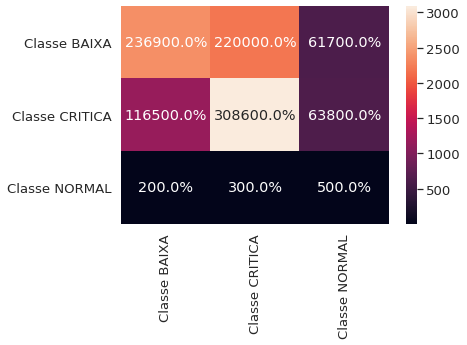

In [ ]:
sns.set(font_scale=1.2)
plt.figure(figsize=(6,4))
df_cm = pd.DataFrame(cm, index=classes, columns=classes)

sns.heatmap(df_cm, annot=True, fmt=".1%")
#sns.heatmap(cm, annot=True,fmt='d',labels = classes)

# **GridSearch**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV 
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import make_pipeline
%matplotlib inline

#adasyn = ADASYN(random_state=88)
smt = SMOTE()
X_smt, y_smt = smt.fit_resample(X_train, y_train)

models = [     
          #{'name': 'dsc','label': 'Descision Tree', 
          # 'classifier': DecisionTreeClassifier(random_state=88),
          # 'grid': {"max_depth":np.arange(8)+1}},

          {'name': 'rf','label': 'Random Forest', 
           'classifier': RandomForestClassifier(random_state=88),
           'grid': {'max_features':['sqrt'],'max_depth' : [4,5,6,7,8],'n_estimators':[500],
                    'min_samples_leaf': [10,50,100,200,500]}}]


                     
          #{'name': 'etc','label': 'Extra Tree', 
          # 'classifier': ExtraTreesClassifier(random_state=88),
          # 'grid': {'n_estimators': [100,200, 500],'max_features': ['auto', 'sqrt', 'log2'],
          #          'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}}]

                 
          
 
            

def model_selection(classifier, name, grid, X_train, y_train, scoring):
    random_seed = 1234
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), classifier)

    #cv_results = cross_val_score(imba_pipeline, X_train, y_train, cv = 3, scoring = 'accuracy')
    #clf = imba_pipeline.fit(X_train, y_train)

    gridsearch_cv=GridSearchCV(classifier,grid,cv=cv,scoring = scoring)
    
    gridsearch_cv.fit(X_train, y_train)
    
    results_dict = {}
    
    results_dict['classifier_name'] = name    
    results_dict['classifier'] = gridsearch_cv.best_estimator_
    results_dict['best_params'] = gridsearch_cv.best_params_
    results_dict['Accuracy'] = gridsearch_cv.best_score_
    
    return(results_dict)
results = []
for m in models:    
    print(m['name'])    
    results.append(model_selection(m['classifier'], 
                                   m['name'],
                                   m['grid'],
                                   X_smt, 
                                   y_smt, 
                                   'accuracy'))      
    print('completed')

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending = False)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


rf


KeyboardInterrupt: ignored

In [ ]:
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending = False)
results_df

KeyError: ignored

In [ ]:
results_df['classifier'][0]

In [ ]:
print(classification_report(y_test,gradient_booster.predict(X_test))) 

# GridSearch - Naive Bayes - RF

In [ ]:
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

random_seed = 1234

# Define Parameters

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

#max_depth=[2, 8, 16]
#n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth,n_estimators=n_estimators,
                  min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)

# Build the gridsearch
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
model = dfrst

#model = Pipeline([
#        ('sampling', SMOTE()),
#        ('classification', dfrst)
#    ])


smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)


#imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed),
#                              dfrst)

#cv_results = cross_val_score(imba_pipeline, X_train, y_train, cv = 3, scoring = 'accuracy')
#clf = imba_pipeline.fit(X_train, y_train)

grid = GridSearchCV(estimator= model, param_grid=param_grid, cv = 5)
#grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X_train_smt, y_train_smt)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# **Gradient Boosting**

Classificador:  Gradient Boosting


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           1.2524            6.57s
         2           1.1430            6.47s
         3           1.0503            6.44s
         4           0.9721            6.49s
         5           0.9046            6.48s
         6           0.8454            6.42s
         7           0.7933            6.37s
         8           0.7477            6.29s
         9           0.7071            6.18s
        10           0.6710            6.09s
        20           0.4406            5.98s
        30           0.3166            5.34s
        40           0.2404            4.67s
        50           0.1882            3.92s
        60           0.1504            3.16s
        70           0.1197            2.38s
        80           0.0988            1.59s
        90           0.0817            0.80s
       100           0.0699            0.00s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           1.2524            7.03s
         2           1.1430            6.84s
         3           1.0499            6.93s
         4           0.9718            6.87s
         5           0.9040            6.95s
         6           0.8442            6.85s
         7           0.7911            6.75s
         8           0.7455            6.63s
         9           0.7048            6.58s
        10           0.6681            6.45s
        20           0.4345            6.08s
        30           0.3107            5.43s
        40           0.2327            4.70s
        50           0.1818            3.97s
        60           0.1446            3.19s
        70           0.1167            2.40s
        80           0.0938            1.60s
        90           0.0781            0.80s
       100           0.0662            0.00s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           1.2523            6.73s
         2           1.1428            6.50s
         3           1.0504            6.38s
         4           0.9722            6.45s
         5           0.9046            6.44s
         6           0.8454            6.38s
         7           0.7926            6.41s
         8           0.7469            6.37s
         9           0.7067            6.29s
        10           0.6700            6.22s
        20           0.4377            6.02s
        30           0.3145            5.35s
        40           0.2371            4.67s
        50           0.1836            3.91s
        60           0.1462            3.14s
        70           0.1178            2.37s
        80           0.0955            1.58s
        90           0.0797            0.79s
       100           0.0664            0.00s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           1.2525            6.72s
         2           1.1431            6.90s
         3           1.0502            6.85s
         4           0.9721            6.73s
         5           0.9045            6.63s
         6           0.8445            6.51s
         7           0.7923            6.45s
         8           0.7467            6.37s
         9           0.7061            6.29s
        10           0.6693            6.20s
        20           0.4375            5.92s
        30           0.3147            5.42s
        40           0.2357            4.70s
        50           0.1841            3.99s
        60           0.1469            3.21s
        70           0.1170            2.41s
        80           0.0958            1.60s
        90           0.0791            0.80s
       100           0.0674            0.00s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           1.2516            6.57s
         2           1.1416            6.49s
         3           1.0487            6.51s
         4           0.9700            6.48s
         5           0.9024            6.40s
         6           0.8429            6.32s
         7           0.7904            6.23s
         8           0.7444            6.22s
         9           0.7039            6.16s
        10           0.6675            6.10s
        20           0.4360            5.79s
        30           0.3129            5.22s
        40           0.2360            4.54s
        50           0.1843            3.83s
        60           0.1474            3.10s
        70           0.1186            2.34s
        80           0.0960            1.56s
        90           0.0806            0.78s
       100           0.0685            0.00s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           1.2521            6.75s
         2           1.1424            6.61s
         3           1.0499            6.42s
         4           0.9716            6.34s
         5           0.9043            6.28s
         6           0.8447            6.19s
         7           0.7922            6.16s
         8           0.7464            6.12s
         9           0.7061            6.05s
        10           0.6696            6.00s
        20           0.4397            5.79s
        30           0.3161            5.20s
        40           0.2371            4.54s
        50           0.1856            3.81s
        60           0.1488            3.10s
        70           0.1184            2.34s
        80           0.0969            1.57s
        90           0.0806            0.78s
       100           0.0689            0.00s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           1.2525            6.31s
         2           1.1432            6.36s
         3           1.0505            6.35s
         4           0.9724            6.35s
         5           0.9049            6.29s
         6           0.8454            6.22s
         7           0.7926            6.17s
         8           0.7471            6.15s
         9           0.7066            6.06s
        10           0.6702            6.01s
        20           0.4371            5.78s
        30           0.3128            5.27s
        40           0.2371            4.64s
        50           0.1847            3.92s
        60           0.1459            3.13s
        70           0.1165            2.35s
        80           0.0952            1.57s
        90           0.0794            0.78s
       100           0.0673            0.00s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           1.2516            6.73s
         2           1.1415            6.79s
         3           1.0488            6.78s
         4           0.9701            6.66s
         5           0.9020            6.53s
         6           0.8427            6.43s
         7           0.7899            6.39s
         8           0.7440            6.32s
         9           0.7033            6.26s
        10           0.6668            6.21s
        20           0.4338            6.00s
        30           0.3118            5.38s
        40           0.2333            4.69s
        50           0.1817            3.91s
        60           0.1449            3.13s
        70           0.1168            2.35s
        80           0.0947            1.59s
        90           0.0781            0.80s
       100           0.0658            0.00s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           1.2522            6.67s
         2           1.1426            6.55s
         3           1.0498            6.55s
         4           0.9716            6.62s
         5           0.9041            6.56s
         6           0.8446            6.51s
         7           0.7922            6.47s
         8           0.7465            6.40s
         9           0.7060            6.33s
        10           0.6696            6.23s
        20           0.4387            5.86s
        30           0.3149            5.32s
        40           0.2395            4.62s
        50           0.1869            3.90s
        60           0.1493            3.12s
        70           0.1196            2.35s
        80           0.0971            1.57s
        90           0.0805            0.78s
       100           0.0676            0.00s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           1.2523            6.43s
         2           1.1428            6.31s
         3           1.0498            6.31s
         4           0.9716            6.34s
         5           0.9039            6.31s
         6           0.8443            6.23s
         7           0.7916            6.16s
         8           0.7460            6.12s
         9           0.7053            6.03s
        10           0.6689            5.94s
        20           0.4350            5.79s
        30           0.3133            5.24s
        40           0.2362            4.58s
        50           0.1846            3.86s
        60           0.1472            3.11s
        70           0.1169            2.34s
        80           0.0948            1.56s
        90           0.0786            0.79s
       100           0.0661            0.00s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           1.2525            6.80s
         2           1.1432            6.76s
         3           1.0506            6.73s
         4           0.9725            6.64s
         5           0.9052            6.59s
         6           0.8457            6.52s
         7           0.7931            6.45s
         8           0.7475            6.42s
         9           0.7071            6.34s
        10           0.6706            6.25s
        20           0.4389            5.95s
        30           0.3162            5.39s
        40           0.2390            4.66s
        50           0.1863            3.91s
        60           0.1486            3.13s
        70           0.1198            2.37s
        80           0.0966            1.59s
        90           0.0797            0.79s
       100           0.0685            0.00s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           1.2535            6.77s
         2           1.1449            6.82s
         3           1.0522            6.81s
         4           0.9747            6.68s
         5           0.9072            6.58s
         6           0.8475            6.54s
         7           0.7949            6.52s
         8           0.7499            6.48s
         9           0.7093            6.40s
        10           0.6727            6.31s
        20           0.4400            5.99s
        30           0.3170            5.35s
        40           0.2401            4.66s
        50           0.1857            3.91s
        60           0.1483            3.15s
        70           0.1201            2.37s
        80           0.0984            1.58s
        90           0.0809            0.79s
       100           0.0685            0.00s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           1.2520            6.83s
         2           1.1424            6.78s
         3           1.0493            6.72s
         4           0.9709            6.68s
         5           0.9031            6.59s
         6           0.8435            6.51s
         7           0.7910            6.42s
         8           0.7452            6.33s
         9           0.7045            6.25s
        10           0.6680            6.16s
        20           0.4357            5.85s
        30           0.3137            5.33s
        40           0.2344            4.61s
        50           0.1832            3.88s
        60           0.1461            3.11s
        70           0.1167            2.35s
        80           0.0955            1.57s
        90           0.0787            0.79s
       100           0.0662            0.00s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           1.2522            6.89s
         2           1.1427            6.87s
         3           1.0502            6.82s
         4           0.9719            6.73s
         5           0.9044            6.62s
         6           0.8451            6.54s
         7           0.7923            6.47s
         8           0.7466            6.39s
         9           0.7063            6.28s
        10           0.6698            6.21s
        20           0.4373            6.04s
        30           0.3136            5.38s
        40           0.2368            4.71s
        50           0.1840            3.94s
        60           0.1467            3.16s
        70           0.1176            2.38s
        80           0.0965            1.59s
        90           0.0809            0.80s
       100           0.0681            0.00s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           1.2527            6.50s
         2           1.1435            6.76s
         3           1.0512            6.61s
         4           0.9732            6.56s
         5           0.9060            6.51s
         6           0.8467            6.45s
         7           0.7941            6.34s
         8           0.7485            6.27s
         9           0.7081            6.18s
        10           0.6718            6.10s
        20           0.4397            6.04s
        30           0.3161            5.43s
        40           0.2389            4.79s
        50           0.1861            4.01s
        60           0.1475            3.22s
        70           0.1195            2.42s
        80           0.0970            1.62s
        90           0.0793            0.81s
       100           0.0679            0.00s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           1.2522            8.65s
         2           1.1426            8.86s
         3           1.0497            8.76s
         4           0.9715            8.66s
         5           0.9037            8.57s
         6           0.8442            8.56s
         7           0.7915            8.45s
         8           0.7458            8.34s
         9           0.7054            8.23s
        10           0.6686            8.09s
        20           0.4363            7.78s
        30           0.3139            7.07s
        40           0.2351            6.18s
        50           0.1840            5.19s
        60           0.1462            4.18s
        70           0.1173            3.14s
        80           0.0963            2.09s
        90           0.0795            1.05s
       100           0.0675            0.00s
Classificador:  Gradient Boosting
                  precision    recall  f1-score   support

Classe

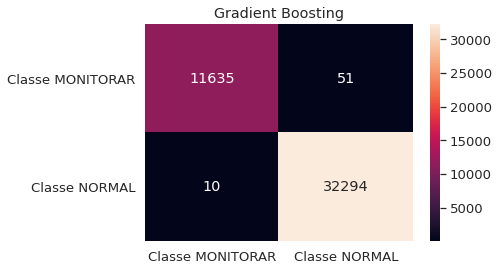

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

#smt = SMOTE()
#X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)


names = ["Gradient Boosting"]
             

classifiers = [GradientBoostingClassifier(learning_rate=0.1,verbose=1)]


def evaluate_model(X_train, y_train, model,name):

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = 2345), model)

    cv_results = cross_val_score(imba_pipeline, X_train, y_train, cv = cv, scoring = 'accuracy')
    clf = imba_pipeline.fit(X_train, y_train)

    preds = clf.predict(X_test)
   
    diff = cv_results.mean() - clf.score(X_test, y_test)
    SD = diff / cv_results.std()
    report = classification_report(y_test, preds,target_names= classes)

    print('Classificador: ',name)
    print(report)
    print(f"Training Score:{clf.score(X_train, y_train)}")
    print(f"Cross V Score: {cv_results.mean()} +/- {cv_results.std()}")
    print(f"Testing Score: {clf.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

    cm = confusion_matrix(y_test,preds)
           
    return cm


for name, model in zip(names, classifiers):
    
     
    print('Classificador: ',name)
    (cm)= evaluate_model(X_train, y_train, model,name) 
    sns.set(font_scale=1.2)
    plt.figure(figsize=(6,4))
    plt.title(name)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    sns.heatmap(df_cm,annot=True,fmt='d')



#kf = KFold(n_splits=5,random_state=42,shuffle=True)
#for train_index,val_index in kf.split(X):
#    X_train,X_val = X.iloc[train_index],X.iloc[val_index],
#    y_train,y_val = y.iloc[train_index],y.iloc[val_index],




#gradient_booster.fit(X_train_smt,y_train_smt)
  

In [24]:
import pickle
file_name = "/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/modelos/gb_2cl.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

#gradient_booster.save('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/modelos/gb_4_classes.hdf5')

In [ ]:
y_predict = gradient_booster.predict(X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=0,test_size = 0.25)

Text(0.5, 58.5, 'Predição')

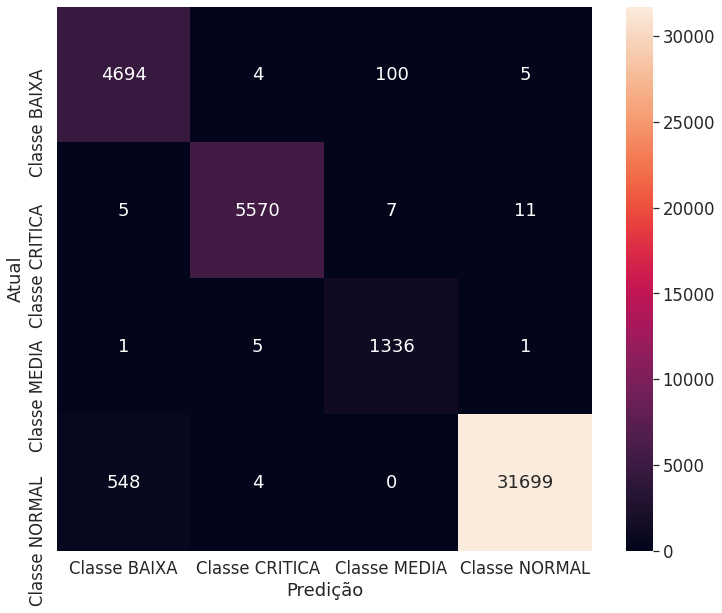

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


#confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))
cf_matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize = (12,10))
sns.set (font_scale = 1.5)
sns.heatmap(cf_matrix, annot=True, fmt='d',xticklabels=classes, yticklabels=classes)
plt.ylabel('Atual')
plt.xlabel('Predição')

# **Análise de Único Classificador**

In [28]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import classification_report
from catboost import Pool, CatBoostClassifier
import lightgbm
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

%matplotlib inline

random_seed = 1234

#names = ["MLPClassifier"]
names = ["Random Forest"]

classifiers = [
    MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)]

             

classifiers = [RandomForestClassifier(max_depth=16,n_estimators=64, max_features='sqrt',oob_score = True,verbose=1)]


undersample = RandomUnderSampler(sampling_strategy='majority')                                        

def evaluate_model(X_train, y_train, model,name):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    # define undersample strategy
    
    # fit and apply the transform
    #X_over, y_over = undersample.fit_resample(X, y)

    #imba_pipeline = make_pipeline(RandomUnderSampler(sampling_strategy='majority'),model)
   
    imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), model)

    cv_results = cross_val_score(imba_pipeline, X_train, y_train, cv = cv, scoring = 'accuracy')
    clf = imba_pipeline.fit(X_train, y_train)

    preds = clf.predict(X_test)
   
    diff = cv_results.mean() - clf.score(X_test, y_test)
    SD = diff / cv_results.std()
    report = classification_report(y_test, preds,target_names= classes)

    print('Classificador: ',name)
    print(report)
    print(f"Training Score:{clf.score(X_train, y_train)}")
    print(f"Cross V Score: {cv_results.mean()} +/- {cv_results.std()}")
    print(f"Testing Score: {clf.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

    cm = confusion_matrix(y_test,preds)
           
    return cm

for name, model in zip(names, classifiers):
    
    #evaluate_model(X_train, y_train, model,name) 
    print('Classificador: ',name)
    (cm)= evaluate_model(X_train, y_train, model,name) 
    sns.set(font_scale=1.2)
    plt.figure(figsize=(6,4))
    plt.title(name)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    sns.heatmap(df_cm,annot=True,fmt='d')
    #score = clf.score(X_test, y_test)
    #scores.append(score)


Classificador:  Random Forest


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend Sequentia

KeyboardInterrupt: ignored

In [14]:
import pickle
file_name = "/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/modelos/rf_2_cl_p.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

# **Rede Neural**

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from keras.layers.core import Dropout
from keras.regularizers import l1
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical


# encode class values as integers
#encoder = LabelEncoder()
#encoder.fit(y)
#encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
#dummy_y = np_utils.to_categorical(encoded_Y)

#Y_train = to_categorical(train_labels)
#Y_test  = to_categorical(test_labels)



smt = SMOTE()
Xf, yf = smt.fit_resample(X, Y)

yf = pd.get_dummies(yf)

yf = np.array(yf, dtype=np.float)
Xf = np.array(Xf, dtype=np.float)



##num_folds = 2

# Define the K-fold Cross Validator
##kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
acc_per_fold = []
loss_per_fold = []
classes = 2
epocas = 10

X_train, X_test, y_train, y_test = train_test_split(Xf, yf, test_size=0.3)

#X_train, y_train = smt.fit_resample(X_train, y_train)

#y_train = to_categorical(y_train)
#y_test  = to_categorical(y_test)

#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1234)

##for train, test in kfold.split(Xf, yf):

#for train, test in cv.split(Xf, yf):  
classifier = Sequential()
  # Hidden Layer 1
classifier.add(Dense(144, activation='relu', kernel_initializer='random_normal', input_dim=X.shape[1]))
classifier.add(Dropout(0.10))
  # Hidden Layer 2
 # classifier.add(Dense(144, activation='relu', kernel_initializer='random_normal'))#,activity_regularizer=l1(0.0001)))
  #classifier.add(Dropout(0.10))
  # Hidden Layer 3
 # classifier.add(Dense(144, activation='relu', kernel_initializer='random_normal'))#,activity_regularizer=l1(0.0001)))
  #classifier.add(Dropout(0.25))
  # Hidden Layer 4
classifier.add(Dense(72, activation='relu', kernel_initializer='random_normal'))
  #classifier.add(Dropout(0.25))
  # Hidden Layer 5
  #classifier.add(Dense(72, activation='relu', kernel_initializer='random_normal'))
  #classifier.add(Dropout(0.25))
  # Hidden Layer 6
classifier.add(Dense(36, activation='relu', kernel_initializer='random_normal'))
  #classifier.add(Dropout(0.5))
  # Hidden Layer 7
classifier.add(Dense(20, activation='relu', kernel_initializer='random_normal'))#,activity_regularizer=l1(0.0001)))
classifier.add(Dropout(0.15))
  #Output Layer
classifier.add(Dense(classes, activation='sigmoid', kernel_initializer='random_normal'))
  

  #Compiling the neural network
classifier.compile(optimizer ='adam',loss='categorical_crossentropy', metrics =['accuracy'])

  # Generate a print
print('------------------------------------------------------------------------')
print(f'Training for fold {fold_no} ...')

  #Fitting the data to the training dataset
history = classifier.fit(X_train,y_train, batch_size=10,validation_data=(X_test, y_test), epochs=epocas)
  #history = classifier.fit(Xf[train],yf[train],validation_data=(Xf[test],yf[test]), batch_size=64, epochs=400)

scores = classifier.evaluate(X_test, y_test, verbose=0)

print(f'Score for fold {fold_no}: {classifier.metrics_names[0]} of {scores[0]}; {classifier.metrics_names[1]} of {scores[1]*100}%')
acc_per_fold.append(scores[1] * 100)
loss_per_fold.append(scores[0])

  # Increase fold number
##fold_no = fold_no + 1


#eval_model=classifier.evaluate(X_train, y_train)




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
18091/18091 [==============================] - 44s 2ms/step - loss: 0.0135 - accuracy: 0.9982 - val_loss: 0.0310 - val_accuracy: 0.9998
Epoch 2/10
18091/18091 [==============================] - 43s 2ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0029 - val_accuracy: 0.9998
Epoch 3/10
18091/18091 [==============================] - 43s 2ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.0036 - val_accuracy: 0.9998
Epoch 4/10
18091/18091 [==============================] - 44s 2ms/step - loss: 8.2395e-04 - accuracy: 0.9999 - val_loss: 0.1276 - val_accuracy: 0.9998
Epoch 5/10
18091/18091 [==============================] - 43s 2ms/step - loss: 0.0091 - accuracy: 0.9997 - val_loss: 0.0033 - val_accuracy: 0.9998
Epoch 6/10
18091/18091 [==============================] - 43s 2ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0030 - val_accuracy: 0.9998
Epoch 7/10
18091/

In [17]:
pip install h5py

In [18]:
# serialize weights to HDF5
classifier.save_weights("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/modelos/rn_2cl.h5")
print("Saved model to disk")

Saved model to disk


# **Visualiza Rede Neural**

In [19]:
!pip3 install ann_visualizer

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp37-none-any.whl size=4168 sha256=45d2697a49ca8fde078d767f8897248bf2fc0abc3b4c01151d6a2003c6f2ac94
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [20]:
!pip install graphviz

In [21]:
import ann_visualizer as ann_viz

In [22]:
from ann_visualizer.visualize import ann_viz;

ann_viz(classifier, title="My first neural network")

In [23]:
figura = ann_viz(classifier, view=True, filename='/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/modelos/exemplo.png', title=' Rede Neural 4 Classes - Análise de Óleo')
figura

# **Relatórios da Rede Neural**

In [8]:
from keras.utils import plot_model
from keras.models import load_model

In [25]:
loss, accuracy = classifier.evaluate(X_train,y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = classifier.evaluate(X_test,y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

#Xf[train],yf[train],validation_data=(Xf[test],yf[test]

Training Accuracy: 0.9999
Testing Accuracy:  0.9998


In [9]:
path_modelo = "/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/modelos/rn_2cl.h5"

In [28]:
print("[INFO] Gravando o modelo...")
classifier.save(path_modelo)


[INFO] Gravando o modelo...


In [10]:
model = load_model(path_modelo)

In [11]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 144)               2448      
_________________________________________________________________
dropout_4 (Dropout)          (None, 144)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 72)                10440     
_________________________________________________________________
dense_12 (Dense)             (None, 36)                2628      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                740       
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                

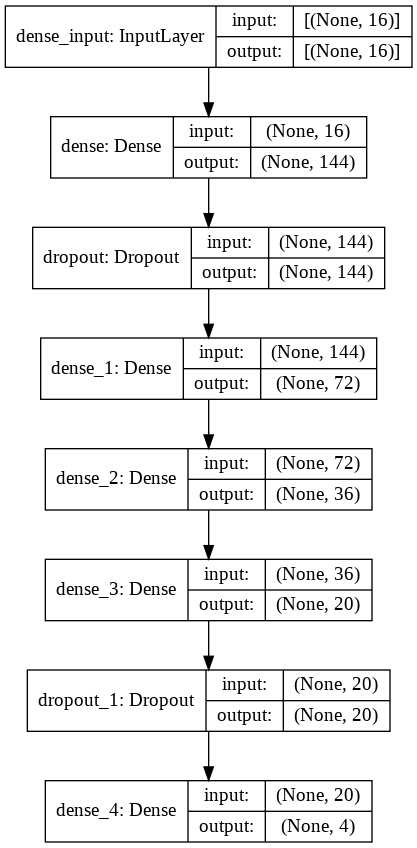

In [ ]:
plot_model(model, to_file='/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/modelos/model_RN_4_Classes.png', show_shapes=True, show_layer_names=True)

In [13]:
from sklearn.preprocessing import LabelBinarizer
y_test = LabelBinarizer().fit_transform(y_test)
#testY = LabelBinarizer().fit_transform(X_test)

In [14]:
X_test = np.array(X_test, dtype=np.float)
y_test = np.array(y_test, dtype=np.float)
y_predict = model.predict(X_test, batch_size=32)

In [15]:
from sklearn.metrics import classification_report
report=classification_report(y_test.argmax(axis=1),y_predict.argmax(axis=1),target_names=classes)
report

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'                  precision    recall  f1-score   support\n\nClasse MONITORAR       1.00      0.27      0.42     43990\n   Classe NORMAL       0.00      0.00      0.00         0\n\n        accuracy                           0.27     43990\n       macro avg       0.50      0.13      0.21     43990\n    weighted avg       1.00      0.27      0.42     43990\n'

Text(0.5, 58.5, 'Predição')

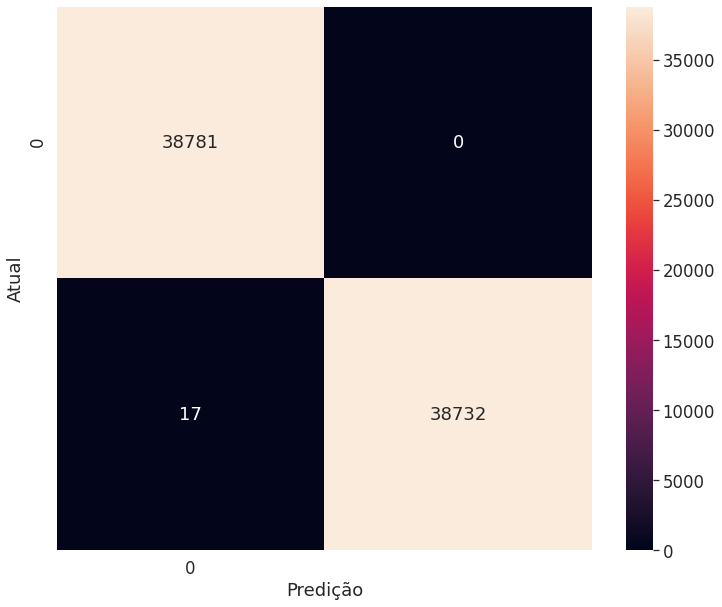

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


#confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))
cf_matrix = confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1))

plt.figure(figsize = (12,10))
sns.set (font_scale = 1.5)
sns.heatmap(cf_matrix, annot=True, fmt='d',xticklabels=classes, yticklabels=classes)
plt.ylabel('Atual')
plt.xlabel('Predição')
##sns.heatmap(cf_matrix, annot=True)
##sns.set (font_scale = 0.8)
#print(cf_matrix)
#sns.set(font_scale=1.2)
#plt.figure(figsize=(6,4))
#df_cm = pd.DataFrame(cf_matrix, index=classes, columns=classes)
#w=sns.heatmap(df_cm, annot=True, fmt=".1%")
#w 

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=["Cracking","Junta", "Solda","Squat"]))

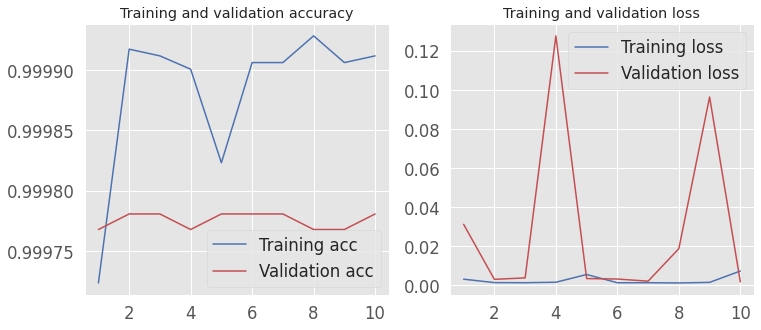

In [34]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)    

#dropout 0.25 em 2 camadas iniciais

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

# Curva **ROC**

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score



# Binarize the output

y_bin = label_binarize(Y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=.5,
                                                    random_state=0)
random_seed = 1224
random_state = 1


# Learn to predict each class against the other

model = svm.SVC(kernel='linear', probability=True,random_state=random_state)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), model)

classifier = OneVsRestClassifier(imba_pipeline)

y_score = classifier.fit(X_train, y_train).decision_function(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i],_ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y1_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


ValueError: ignored

In [ ]:
y_test.ravel

<function ndarray.ravel>

In [ ]:
pip install focal-loss

In [ ]:
import numpy as np
from scipy import optimize
from scipy import special

class FocalLoss:

    def __init__(self, gamma, alpha=None):
        self.alpha = alpha
        self.gamma = gamma

    def at(self, y):
        if self.alpha is None:
            return np.ones_like(y)
        return np.where(y, self.alpha, 1 - self.alpha)

    def pt(self, y, p):
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return np.where(y, p, 1 - p)

    def __call__(self, y_true, y_pred):
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        return -at * (1 - pt) ** self.gamma * np.log(pt)

    def grad(self, y_true, y_pred):
        y = 2 * y_true - 1  # {0, 1} -> {-1, 1}
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        g = self.gamma
        return at * y * (1 - pt) ** g * (g * pt * np.log(pt) + pt - 1)

    def hess(self, y_true, y_pred):
        y = 2 * y_true - 1  # {0, 1} -> {-1, 1}
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        g = self.gamma

        u = at * y * (1 - pt) ** g
        du = -at * y * g * (1 - pt) ** (g - 1)
        v = g * pt * np.log(pt) + pt - 1
        dv = g * np.log(pt) + g + 1

        return (du * v + u * dv) * y * (pt * (1 - pt))

    def init_score(self, y_true):
        res = optimize.minimize_scalar(
            lambda p: self(y_true, p).sum(),
            bounds=(0, 1),
            method='bounded'
        )
        p = res.x
        log_odds = np.log(p / (1 - p))
        return log_odds

    def lgb_obj(self, preds, train_data):
        y = train_data.get_label()
        p = special.expit(preds)
        return self.grad(y, p), self.hess(y, p)

    def lgb_eval(self, preds, train_data):
        y = train_data.get_label()
        p = special.expit(preds)
        is_higher_better = False
        return 'focal_loss', self(y, p).mean(), is_higher_better

In [ ]:
import numpy as np
from joblib import Parallel, delayed
from sklearn.multiclass import _ConstantPredictor
from sklearn.preprocessing import LabelBinarizer
from scipy import special
import lightgbm as lgb


class OneVsRestLightGBMWithCustomizedLoss:

    def __init__(self, loss, n_jobs=3):
        self.loss = loss
        self.n_jobs = n_jobs

    def fit(self, X, y, **fit_params):

        self.label_binarizer_ = LabelBinarizer(sparse_output=True)
        Y = self.label_binarizer_.fit_transform(y)
        Y = Y.tocsc()
        self.classes_ = self.label_binarizer_.classes_
        columns = (col.toarray().ravel() for col in Y.T)
        if 'eval_set' in fit_params:
            # use eval_set for early stopping
            X_val, y_val = fit_params['eval_set'][0]
            Y_val = self.label_binarizer_.transform(y_val)
            Y_val = Y_val.tocsc()
            columns_val = (col.toarray().ravel() for col in Y_val.T)
            self.results_ = Parallel(n_jobs=self.n_jobs)(delayed(self._fit_binary)
                                                         (X, column, X_val, column_val, **fit_params) for
                                                         i, (column, column_val) in
                                                         enumerate(zip(columns, columns_val)))
        else:
            # eval set not available
            self.results_ = Parallel(n_jobs=self.n_jobs)(delayed(self._fit_binary)
                                                         (X, column, None, None, **fit_params) for i, column
                                                         in enumerate(columns))

        return self

    def _fit_binary(self, X, y, X_val, y_val, **fit_params):
        unique_y = np.unique(y)
        init_score_value = self.loss.init_score(y)
        if len(unique_y) == 1:
            estimator = _ConstantPredictor().fit(X, unique_y)
        else:
            fit = lgb.Dataset(X, y, init_score=np.full_like(y, init_score_value, dtype=float))
            if 'eval_set' in fit_params:
                val = lgb.Dataset(X_val, y_val, init_score=np.full_like(y_val, init_score_value, dtype=float),
                                  reference=fit)

                estimator = lgb.train(params=fit_params,
                                      train_set=fit,
                                      valid_sets=(fit, val),
                                      valid_names=('fit', 'val'),
                                      early_stopping_rounds=10,
                                      fobj=self.loss.lgb_obj,
                                      feval=self.loss.lgb_eval,
                                      verbose_eval=10)
            else:
                estimator = lgb.train(params=fit_params,
                                      train_set=fit,
                                      fobj=self.loss.lgb_obj,
                                      feval=self.loss.lgb_eval,
                                      verbose_eval=10)

        return estimator, init_score_value

    def predict(self, X):

        n_samples = X.shape[0]
        maxima = np.empty(n_samples, dtype=float)
        maxima.fill(-np.inf)
        argmaxima = np.zeros(n_samples, dtype=int)

        for i, (e, init_score) in enumerate(self.results_):
            margins = e.predict(X, raw_score=True)
            prob = special.expit(margins + init_score)
            np.maximum(maxima, prob, out=maxima)
            argmaxima[maxima == prob] = i

        return argmaxima

    def predict_proba(self, X):
        y = np.zeros((X.shape[0], len(self.results_)))
        for i, (e, init_score) in enumerate(self.results_):
            margins = e.predict(X, raw_score=True)
            y[:, i] = special.expit(margins + init_score)
        y /= np.sum(y, axis=1)[:, np.newaxis]
        return y

In [ ]:
from joblib import Parallel, delayed
from sklearn.multiclass import _ConstantPredictor
from sklearn.preprocessing import LabelBinarizer
from scipy import special
import lightgbm as lgb
import torch
import torch.nn.functional as F
#from OneVsRestLightGBMWithCustomizedLoss import *
from focal_loss import BinaryFocalLoss
from sklearn.metrics import plot_confusion_matrix
import numpy as np
from joblib import Parallel, delayed
from sklearn.multiclass import _ConstantPredictor
from sklearn.preprocessing import LabelBinarizer
from scipy import special
import lightgbm as lgb


class OneVsRestLightGBMWithCustomizedLoss:

    def __init__(self, loss, n_jobs=3):
        self.loss = loss
        self.n_jobs = n_jobs

    def fit(self, X, y, **fit_params):

        self.label_binarizer_ = LabelBinarizer(sparse_output=True)
        Y = self.label_binarizer_.fit_transform(y)
        Y = Y.tocsc()
        self.classes_ = self.label_binarizer_.classes_
        columns = (col.toarray().ravel() for col in Y.T)
        if 'eval_set' in fit_params:
            # use eval_set for early stopping
            X_val, y_val = fit_params['eval_set'][0]
            Y_val = self.label_binarizer_.transform(y_val)
            Y_val = Y_val.tocsc()
            columns_val = (col.toarray().ravel() for col in Y_val.T)
            self.results_ = Parallel(n_jobs=self.n_jobs)(delayed(self._fit_binary)
                                                         (X, column, X_val, column_val, **fit_params) for
                                                         i, (column, column_val) in
                                                         enumerate(zip(columns, columns_val)))
        else:
            # eval set not available
            self.results_ = Parallel(n_jobs=self.n_jobs)(delayed(self._fit_binary)
                                                         (X, column, None, None, **fit_params) for i, column
                                                         in enumerate(columns))

        return self

    def _fit_binary(self, X, y, X_val, y_val, **fit_params):
        unique_y = np.unique(y)
        init_score_value = self.loss.init_score(y)
        if len(unique_y) == 1:
            estimator = _ConstantPredictor().fit(X, unique_y)
        else:
            fit = lgb.Dataset(X, y, init_score=np.full_like(y, init_score_value, dtype=float))
            if 'eval_set' in fit_params:
                val = lgb.Dataset(X_val, y_val, init_score=np.full_like(y_val, init_score_value, dtype=float),
                                  reference=fit)

                estimator = lgb.train(params=fit_params,
                                      train_set=fit,
                                      valid_sets=(fit, val),
                                      valid_names=('fit', 'val'),
                                      early_stopping_rounds=10,
                                      fobj=self.loss.lgb_obj,
                                      feval=self.loss.lgb_eval,
                                      verbose_eval=10)
            else:
                estimator = lgb.train(params=fit_params,
                                      train_set=fit,
                                      fobj=self.loss.lgb_obj,
                                      feval=self.loss.lgb_eval,
                                      verbose_eval=10)

        return estimator, init_score_value

    def predict(self, X):

        n_samples = X.shape[0]
        maxima = np.empty(n_samples, dtype=float)
        maxima.fill(-np.inf)
        argmaxima = np.zeros(n_samples, dtype=int)

        for i, (e, init_score) in enumerate(self.results_):
            margins = e.predict(X, raw_score=True)
            prob = special.expit(margins + init_score)
            np.maximum(maxima, prob, out=maxima)
            argmaxima[maxima == prob] = i

        return argmaxima

    def predict_proba(self, X):
        y = np.zeros((X.shape[0], len(self.results_)))
        for i, (e, init_score) in enumerate(self.results_):
            margins = e.predict(X, raw_score=True)
            y[:, i] = special.expit(margins + init_score)
        y /= np.sum(y, axis=1)[:, np.newaxis]
        return y

# Instantiate Focal loss
loss = FocalLoss(alpha=0.75, gamma=2.0)

# Not using early stopping
clf = OneVsRestLightGBMWithCustomizedLoss(loss=loss)
clf.fit(X_train, y_train)

# Using early stopping
#fit_params = {'eval_set': [(X_test, y_test)]}
#clf.fit(X_train, y_train, **fit_params)

y_test_pred = clf.predict(X_test)
pred_accuracy_score = accuracy_score(y_test, y_test_pred)
pred_recall_score = recall_score(y_test, y_test_pred, average='macro')
print('prediction accuracy', pred_accuracy_score,' recall ', pred_recall_score)

cnf_matrix = confusion_matrix(y_test, y_test_pred, labels=labeles)
plt.figure()
plot_confusion_matrix(cnf_matrix, labels=classes,normalize=True,title='Confusion matrix')
plt.show()

prediction accuracy 0.6950917203767972  recall  0.4645311938664789


TypeError: ignored

In [ ]:
classes

['Class 0', 'Class 1', 'Class 2']